<a href="https://colab.research.google.com/github/DiegoDevper1/Income_Modelo/blob/main/TrabajoCienciadeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sagemaker lab (google colab) solicitar la creación
2. Prepocesamiento/Feature Engineering (imputar, borrar, normalizar, etc,)
3. Predecir si una persona va a ganar más de 50k o menos de 50k
	Naive Bayes
	Arboles de decisión
	Bosque Aleatorio
	XGboost
4. Las conclusiones tienen que estar autodocumentadas en el cuaderno de jupyter

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

#importo el modelo de naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#importo métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#importo librerías de validación cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import ipywidgets as widgets

#árboles
from sklearn import tree
from sklearn.tree import plot_tree

#Bosques
from sklearn.ensemble import RandomForestClassifier

print("Instalado!")

Instalado!


In [ ]:
import os
# Lista de archivos en el directorio actual
files_in_directory = os.listdir()

# Mostrar la lista de archivos para verificar la presencia del archivo
print(files_in_directory)

['.config', 'mi_arbol.jpg', 'ModeloArbol.bin', 'sample_data']


In [ ]:
df = pd.read_csv("https://github.com/adiacla/bigdata/raw/master/adult.csv.zip")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#Mostrar estadisticas de los datos numericos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
#Visualizar las columnas del dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
#Observar la cantidad de personas que ganan >=50K y >50K
income_counts = df['income'].value_counts()
print(income_counts)


income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [ ]:
#Verificar la presencia de datos nulos
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


Carencia de datos númericos nulos, no borraremos ninguna columna debido a esto.

In [ ]:
# Aplicar codificación binaria a las columnas no numericas
df_encoded = pd.get_dummies(df, columns=['race'], dtype=int)
df_encoded['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df_encoded['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

# Observar las primeras filas del DataFrame codificado
print(df_encoded.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship  sex  capital.gain  capital.loss  \
0                  ?  Not-in-family    1             0          4356   
1    Exec-managerial  Not-in-family    1             0          4356   
2                  ?      Unmarried    1             0          4356   
3  Machine-op-inspct      Unmarried    1             0          3900   
4     Prof-specialty      Own-child    1             0          3900   

   hours.per.week native.country  income  race_Amer-Indian-Eskimo  \
0              40  United-States       0                        0

In [ ]:
df_encoded.dtypes

age                         int64
workclass                  object
fnlwgt                      int64
education                  object
education.num               int64
marital.status             object
occupation                 object
relationship               object
sex                         int64
capital.gain                int64
capital.loss                int64
hours.per.week              int64
native.country             object
income                      int64
race_Amer-Indian-Eskimo     int64
race_Asian-Pac-Islander     int64
race_Black                  int64
race_Other                  int64
race_White                  int64
dtype: object

In [ ]:
df_encoded.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White'],
      dtype='object')

In [ ]:
columnas_a_borrar = ['workclass','education', 'marital.status', 'occupation', 'relationship', 'native.country']

# Borrar las columnas del DataFrame
df_encoded = df_encoded.drop(columnas_a_borrar, axis=1)

In [ ]:
df_encoded.columns

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [ ]:
caracteristicas=['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']

<Axes: >

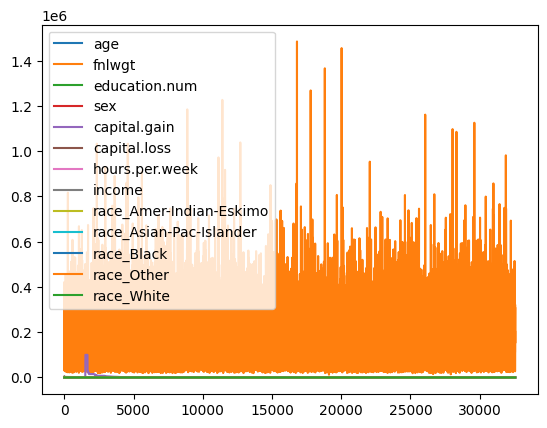

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_encoded.plot()

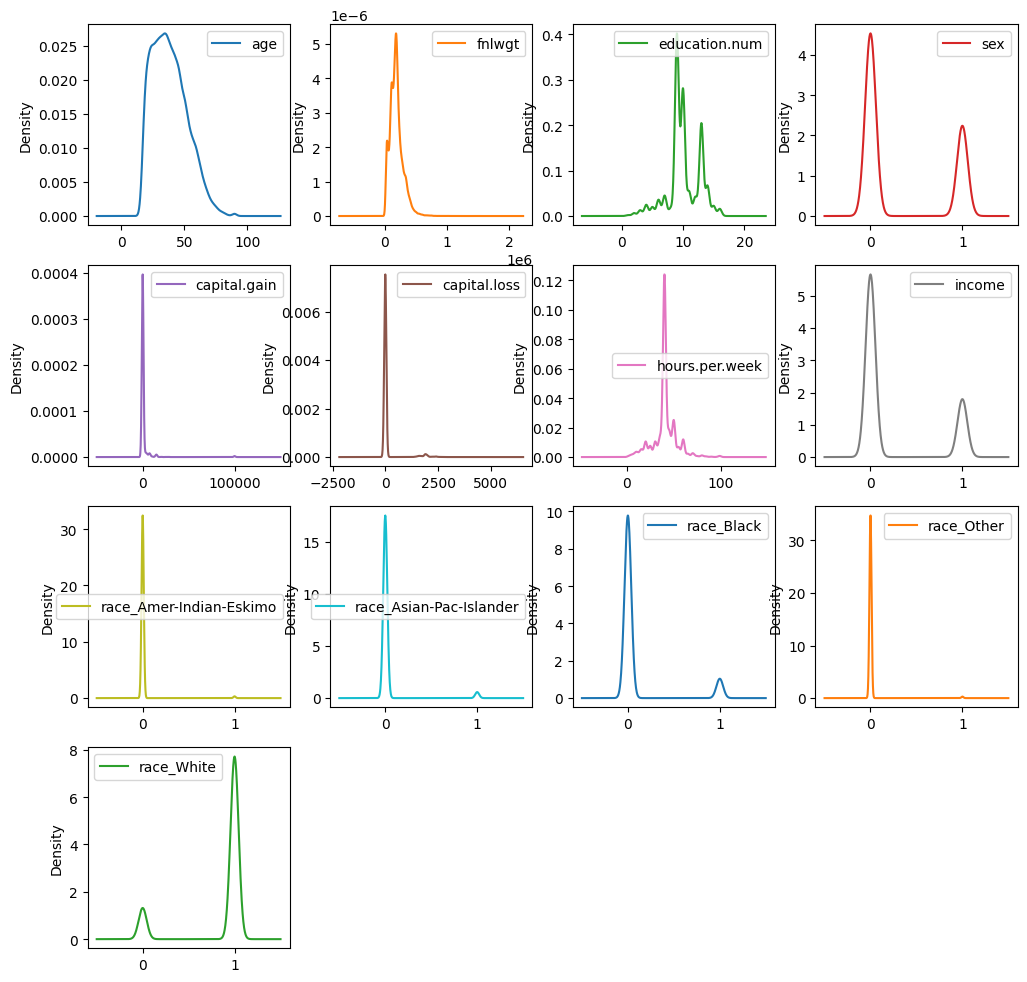

In [ ]:
df_encoded.plot(kind='density',subplots=True,layout=(4,4),figsize=(12,12),sharex=False)
plt.show()

<Axes: ylabel='Density'>

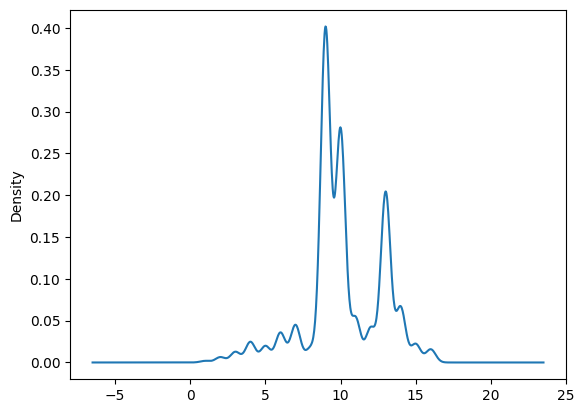

In [ ]:
df['education.num'].plot.density()

<Axes: >

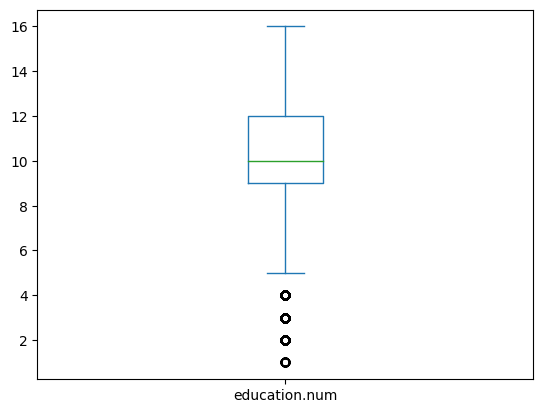

In [ ]:
df_encoded['education.num'].plot.box()

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      32561 non-null  int64
 1   fnlwgt                   32561 non-null  int64
 2   education.num            32561 non-null  int64
 3   sex                      32561 non-null  int64
 4   capital.gain             32561 non-null  int64
 5   capital.loss             32561 non-null  int64
 6   hours.per.week           32561 non-null  int64
 7   income                   32561 non-null  int64
 8   race_Amer-Indian-Eskimo  32561 non-null  int64
 9   race_Asian-Pac-Islander  32561 non-null  int64
 10  race_Black               32561 non-null  int64
 11  race_Other               32561 non-null  int64
 12  race_White               32561 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


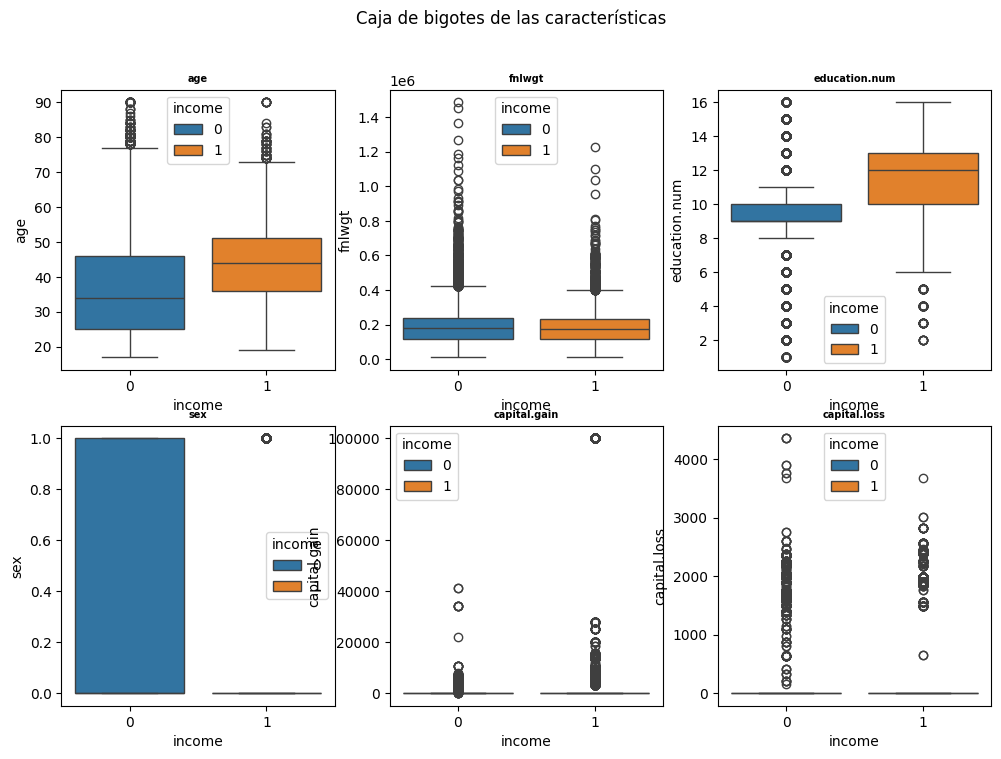

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flat[:len(caracteristicas)]  # Limita el tamaño de axes

# Ajusta el rango del bucle para evitar índices fuera de los límites
for i, columnas in enumerate(caracteristicas[:len(axes)]):
    sns.boxplot(x='income', y=columnas, data=df_encoded, hue='income', ax=axes[i])
    axes[i].set_title(columnas, fontsize=7, fontweight='bold')

fig.suptitle('Caja de bigotes de las características')
plt.show()

<Axes: xlabel='hours.per.week', ylabel='age'>

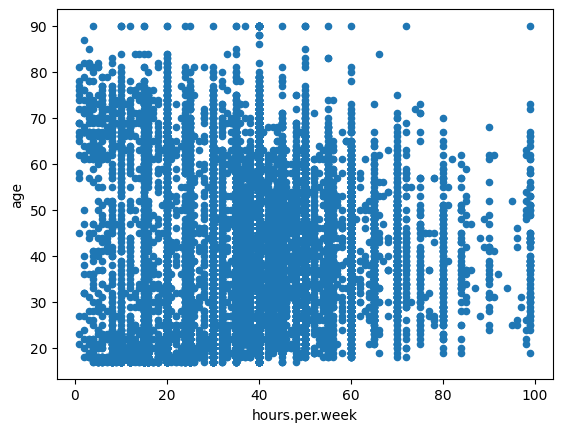

In [ ]:
df_encoded.plot.scatter(x='hours.per.week', y='age')

<Axes: xlabel='hours.per.week', ylabel='age'>

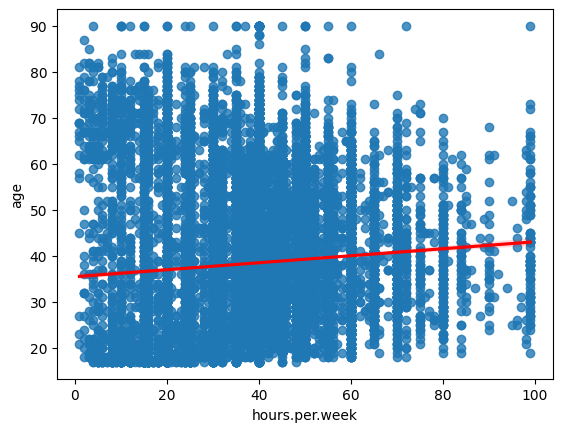

In [ ]:
sns.regplot(x='hours.per.week', y='age', data=df_encoded, line_kws={"color":"red"})

<Axes: xlabel='income', ylabel='education.num'>

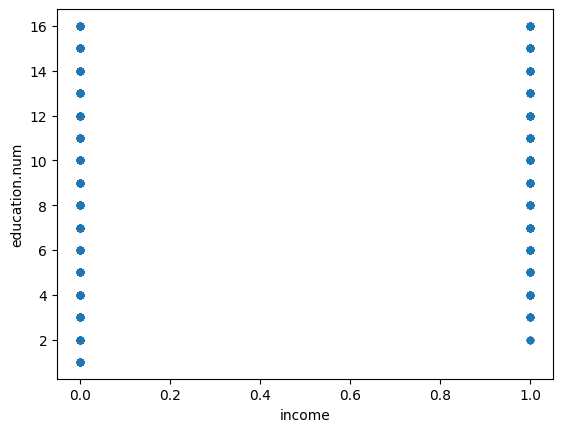

In [ ]:
df_encoded.plot.scatter(x='income', y='education.num')

In [ ]:
#sns.pairplot(df_encoded, hue='income', vars=caracteristicas)

In [ ]:
corr_matrix=df_encoded.corr()
corr_matrix

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
age,1.000000,-0.076646,0.036527,-0.088832,0.077674,0.057775,0.068756,0.234037,-0.010137,-0.011111,-0.019434,-0.034415,0.033412
fnlwgt,-0.076646,1.000000,-0.043195,-0.026858,0.000432,-0.010252,-0.018768,-0.009463,-0.064148,-0.051323,0.118009,0.006376,-0.056896
education.num,0.036527,-0.043195,1.000000,-0.012280,0.122630,0.079923,0.148123,0.335154,-0.029345,0.062091,-0.075272,-0.044133,0.051353
sex,-0.088832,-0.026858,-0.012280,1.000000,-0.048480,-0.045567,-0.229309,-0.215980,0.010820,0.000856,0.115604,0.013906,-0.103486
capital.gain,0.077674,0.000432,0.122630,-0.048480,1.000000,-0.031615,0.078409,0.223329,-0.006015,0.009851,-0.020631,-0.001774,0.014429
capital.loss,0.057775,-0.010252,0.079923,-0.045567,-0.031615,1.000000,0.054256,0.150526,-0.012947,0.004469,-0.021762,-0.005964,0.021044
hours.per.week,0.068756,-0.018768,0.148123,-0.229309,0.078409,0.054256,1.000000,0.229689,-0.003096,-0.004564,-0.053153,-0.007188,0.049345
income,0.234037,-0.009463,0.335154,-0.215980,0.223329,0.150526,0.229689,1.000000,-0.028721,0.010543,-0.089089,-0.031830,0.085224
race_Amer-Indian-Eskimo,-0.010137,-0.064148,-0.029345,0.010820,-0.006015,-0.012947,-0.003096,-0.028721,1.000000,-0.017829,-0.031991,-0.008996,-0.237763
race_Asian-Pac-Islander,-0.011111,-0.051323,0.062091,0.000856,0.009851,0.004469,-0.004564,0.010543,-0.017829,1.000000,-0.059144,-0.016632,-0.439572


In [ ]:
df_encoded.columns

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [ ]:
colors = np.where (df_encoded["income"]==0, "green", "red")
def angulo (x,y):
    fig=plt.figure(figsize=(9,10))
    ax=fig.add_subplot(projection='3d')
    ax.scatter(df_encoded["age"],df_encoded["hours.per.week"],df_encoded["sex"], c=colors, marker="*")
    ax.fontsize=5,
    ax.view_init(x,y)
    ax.set_xlabel("age")
    ax.set_ylabel("hours.per.week")
    ax.set_zlabel("sex")
    plt.show()

grafico=widgets.interact(angulo, x=[60,-90,-45,0,30,45,90], y=[60,-90,-45,30,0,30,45,90])

interactive(children=(Dropdown(description='x', options=(60, -90, -45, 0, 30, 45, 90), value=60), Dropdown(des…

<Axes: >

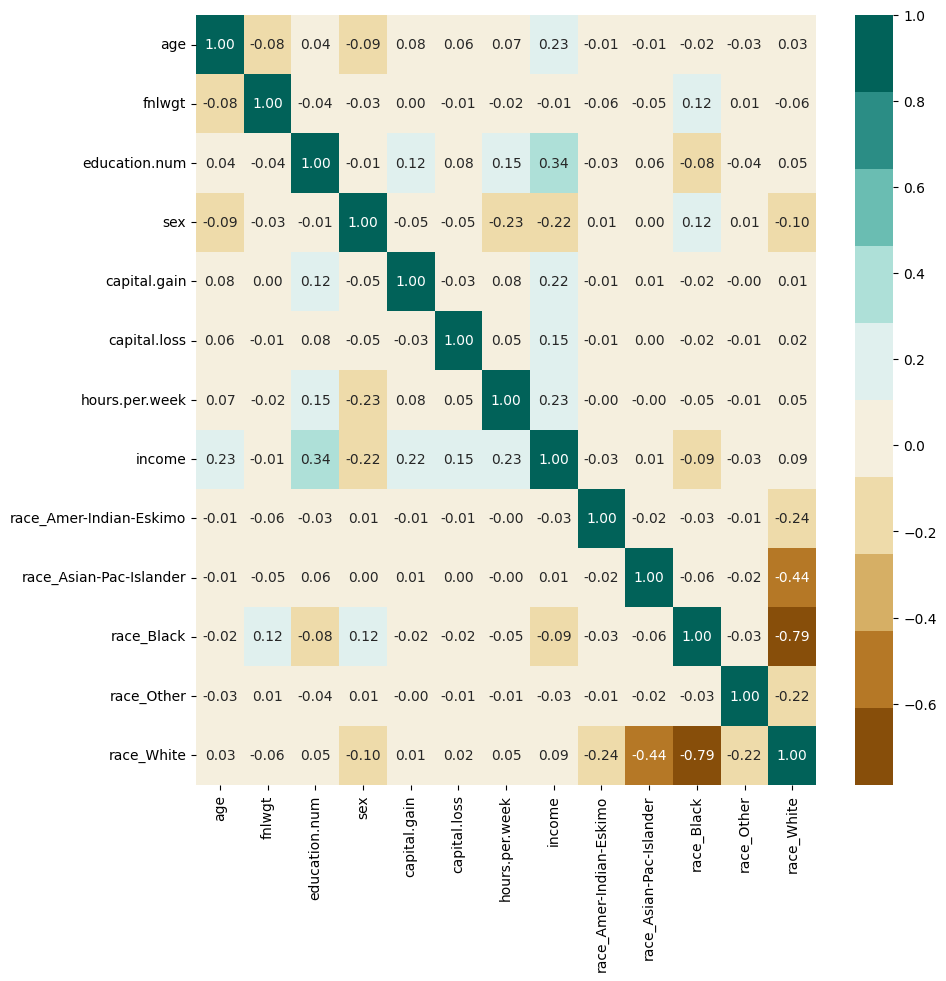

In [ ]:
fig, axis=plt.subplots(figsize=(10,10))
colormap=sns.color_palette("BrBG",10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")

In [ ]:
df_encoded['income'].unique()

array([0, 1])

In [ ]:
df_encoded['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [ ]:
X=df_encoded.drop("income",axis=1)
y=df_encoded["income"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=454,stratify=df['income'])

### Predicción modelo Naive Bayes

Separacion del y_train y el y_test, el cual corresponde al 80% de los datos y el 20% de los datos, respectivamente.

In [ ]:
y_train.value_counts()

income
0    19775
1     6273
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

income
0    4945
1    1568
Name: count, dtype: int64

In [ ]:
len(X_train),(X_test)

(26048,
        age  fnlwgt  education.num  sex  capital.gain  capital.loss  \
 6608    34  346762              7    0             0             0   
 22281   29  253801              9    0             0             0   
 12894   40   99185             13    0             0             0   
 14755   38   60355              9    1             0             0   
 27726   30   95299              9    0             0             0   
 ...    ...     ...            ...  ...           ...           ...   
 13008   25  120238              9    0             0             0   
 22927   59   31137              9    0             0             0   
 32131   65  192825              4    0             0             0   
 9144    33  192644              9    0             0             0   
 31649   54  204397             10    0             0             0   
 
        hours.per.week  race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  \
 6608               84                        0               

In [ ]:
modeloNB=GaussianNB()

In [ ]:
modeloNB.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predict=modeloNB.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predictdf = pd.DataFrame(y_predict, columns=["prediccion"])

In [ ]:
y_test

6608     0
22281    0
12894    0
14755    0
27726    1
        ..
13008    0
22927    1
32131    0
9144     0
31649    0
Name: income, Length: 6513, dtype: int64

In [ ]:
y_predictdf

,prediccion
0,0
1,0
2,0
3,0
4,0
...,...
6508,0
6509,0
6510,0
6511,0


In [ ]:
y_test_ordenado=y_test.reset_index(drop=True)

In [ ]:
comparativo = pd.concat([y_test_ordenado, y_predictdf], axis=1)
print(comparativo.head(20))

    income  prediccion
0        0           0
1        0           0
2        0           0
3        0           0
4        1           0
5        0           0
6        1           0
7        0           0
8        1           1
9        0           0
10       0           0
11       0           0
12       0           0
13       0           0
14       0           0
15       0           0
16       0           0
17       0           0
18       0           0
19       1           1


In [ ]:
modeloNB.score(X_test,y_test)

0.7950253339474896

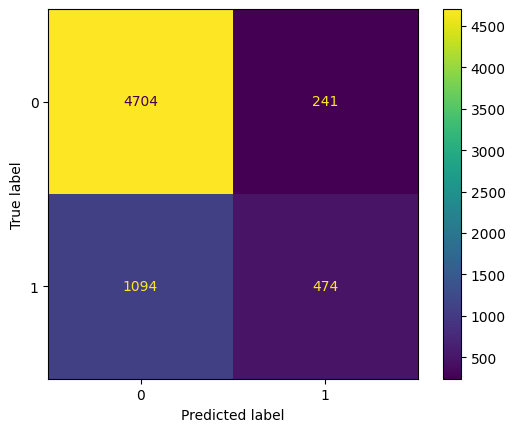

In [ ]:
matrix=confusion_matrix(y_test,y_predict)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloNB.classes_)
mostrarMatrix.plot()

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4945
           1       0.66      0.30      0.42      1568

    accuracy                           0.80      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.78      0.80      0.76      6513



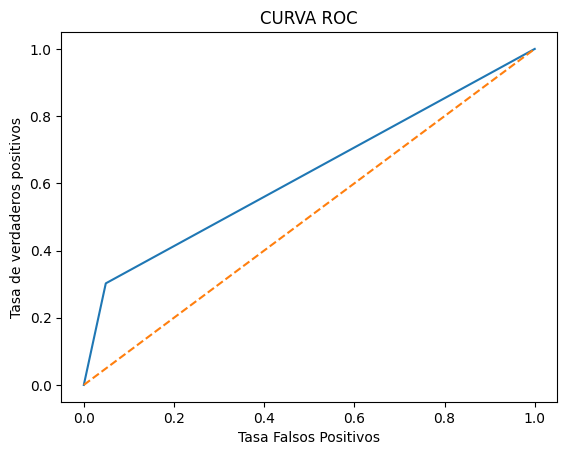

In [ ]:
fpr, tpr, umbral=roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [ ]:
print("Área bajo la curva", auc(fpr,tpr))

Área bajo la curva 0.6267799106498009


In [ ]:
Kpliegues=KFold(n_splits=5)
scores=cross_val_score(modeloNB,X_train,y_train, cv=Kpliegues)
print("Score Nayve Bayes con Cross Validation",scores)
print("Promedio de los scores", scores.mean())
print("Varianza de los scores",scores.var())
print("Número de pliegues usados", len(scores))

Score Nayve Bayes con Cross Validation [0.80921305 0.78809981 0.79059501 0.79823383 0.79055481]
Promedio de los scores 0.7953393009072958
Varianza de los scores 5.973383201289852e-05
Número de pliegues usados 5


In [ ]:
y_train.value_counts()

income
0    19775
1     6273
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

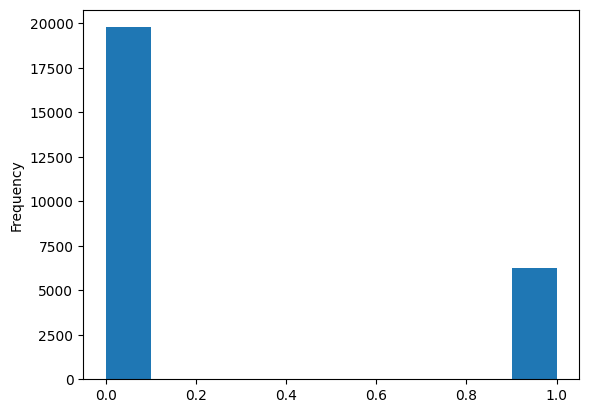

In [ ]:
y_train.plot.hist()

In [ ]:
!pip install imblearn

12546
income
0    6273
1    6273
Name: count, dtype: int64


<Axes: >

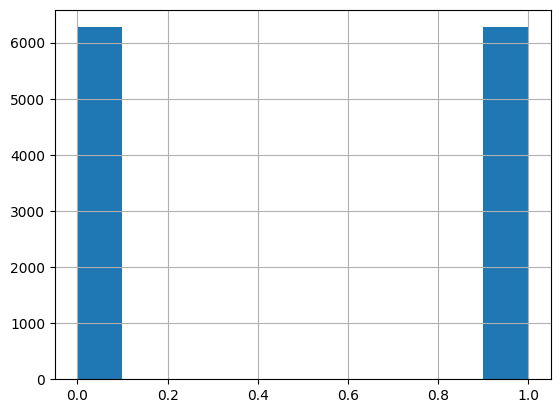

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(len(y_resampled))
print(y_resampled.value_counts())
y_resampled.hist()

In [ ]:
modeloNB2=GaussianNB()

In [ ]:
modeloNB2.fit(X_resampled,y_resampled)

GaussianNB()

In [ ]:
y_predict2=modeloNB2.predict(X_test)

In [ ]:
y_predict2df = pd.DataFrame(y_predict2, columns=["prediccion2"])

In [ ]:
comparativo2 = pd.concat([y_test_ordenado, y_predict2df], axis=1)
print(comparativo2.head(20))

    income  prediccion2
0        0            0
1        0            0
2        0            0
3        0            0
4        1            0
5        0            0
6        1            0
7        0            0
8        1            1
9        0            0
10       0            0
11       0            0
12       0            0
13       0            0
14       0            0
15       0            0
16       0            0
17       0            0
18       0            0
19       1            1


In [ ]:
modeloNB2.score(X_test,y_test)

0.7907262398280362

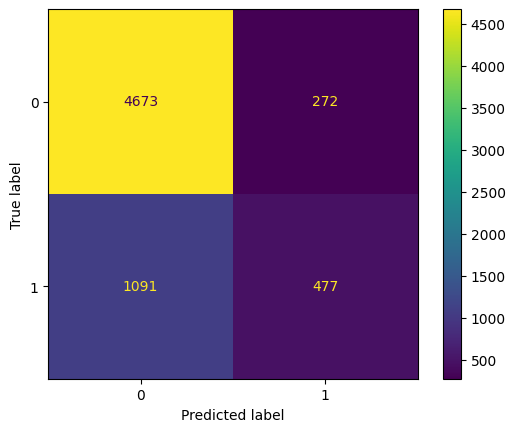

In [ ]:
matrix=confusion_matrix(y_test,y_predict2)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloNB2.classes_)
mostrarMatrix.plot()

In [ ]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4945
           1       0.64      0.30      0.41      1568

    accuracy                           0.79      6513
   macro avg       0.72      0.62      0.64      6513
weighted avg       0.77      0.79      0.76      6513



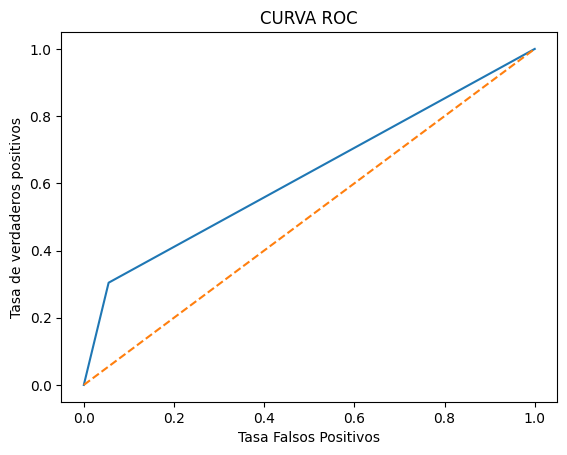

In [ ]:
fpr, tpr, umbral=roc_curve(y_test,y_predict2)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [ ]:
print("Área bajo la curva", auc(fpr,tpr))

Área bajo la curva 0.6246020640308703


In [ ]:
Kpliegues=KFold(n_splits=5)
scores=cross_val_score(modeloNB2,X_resampled,y_resampled, cv=Kpliegues)
print("Score Nayve Bayes con Cross Validation",scores)
print("Promedio de los scores", scores.mean())
print("Varianza de los scores",scores.var())
print("Número de pliegues usados", len(scores))

Score Nayve Bayes con Cross Validation [0.93227092 0.94699083 0.63571144 0.31207652 0.31446792]
Promedio de los scores 0.6283035256344094
Varianza de los scores 0.07850099161768338
Número de pliegues usados 5


2do intento

In [ ]:
df2=df_encoded

In [ ]:
df2.drop('fnlwgt', axis=1, inplace=True)

In [ ]:
df2.dtypes

age                        int64
education.num              int64
sex                        int64
capital.gain               int64
capital.loss               int64
hours.per.week             int64
income                     int64
race_Amer-Indian-Eskimo    int64
race_Asian-Pac-Islander    int64
race_Black                 int64
race_Other                 int64
race_White                 int64
dtype: object

In [ ]:
df2['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [ ]:
df2['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [ ]:
X2=df2.drop("income",axis=1)
y2=df2["income"]

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,train_size=0.8,random_state=454,stratify=df2['income'])

39550
income
1    19775
0    19775
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

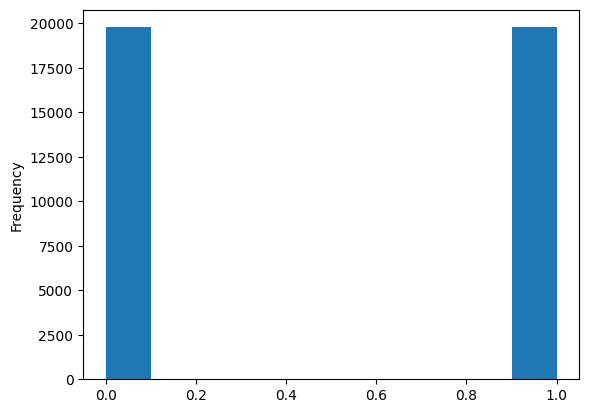

In [ ]:
from imblearn.over_sampling import SMOTE

smote2 = SMOTE()

X2_resampled, y2_resampled = smote2.fit_resample (X2_train, y2_train)

print(len(y2_resampled))
print(y2_resampled.value_counts())
y2_resampled.plot.hist()

In [ ]:
modeloNB3=GaussianNB()

In [ ]:
modeloNB3.fit(X2_resampled,y2_resampled)

GaussianNB()

In [ ]:
y_predict3=modeloNB3.predict(X2_test)

In [ ]:
y_predict3df = pd.DataFrame(y_predict3, columns=["prediccion3"])

In [ ]:
y_test_ordenado2=y2_test.reset_index(drop=True)

In [ ]:
comparativo3 = pd.concat([y_test_ordenado2, y_predict3df], axis=1)
print(comparativo3.head(20))

    income  prediccion3
0        0            0
1        0            0
2        0            0
3        0            0
4        1            0
5        0            0
6        1            0
7        0            0
8        1            1
9        0            0
10       0            0
11       0            0
12       0            0
13       0            0
14       0            0
15       0            0
16       0            0
17       0            0
18       0            0
19       1            1


In [ ]:
modeloNB3.score(X2_test,y2_test)

0.7931828650391525

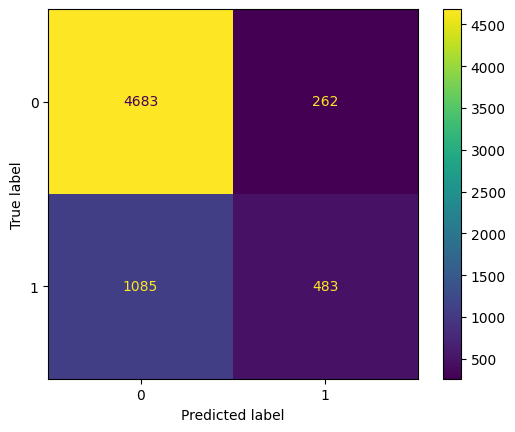

In [ ]:
matrix=confusion_matrix(y2_test,y_predict3)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloNB3.classes_)
mostrarMatrix.plot()

In [ ]:
print(classification_report(y2_test,y_predict3))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4945
           1       0.65      0.31      0.42      1568

    accuracy                           0.79      6513
   macro avg       0.73      0.63      0.65      6513
weighted avg       0.77      0.79      0.76      6513



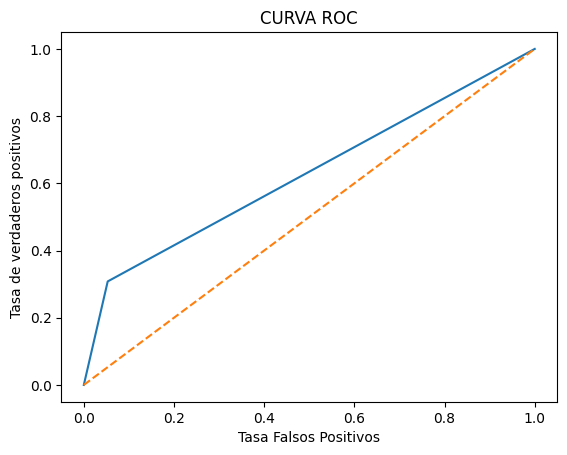

In [ ]:
fpr, tpr, umbral=roc_curve(y2_test,y_predict3)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [ ]:
print("Área bajo la curva", auc(fpr,tpr))

Área bajo la curva 0.6275264516827965


In [ ]:
Kpliegues=KFold(n_splits=5)
scores=cross_val_score(modeloNB3,X2_resampled,y2_resampled, cv=Kpliegues)
print("Score Nayve Bayes con Cross Validation",scores)
print("Promedio de los scores", scores.mean())
print("Varianza de los scores",scores.var())
print("Número de pliegues usados", len(scores))

Score Nayve Bayes con Cross Validation [0.80202276 0.78925411 0.794311   0.46017699 0.3159292 ]
Promedio de los scores 0.632338811630847
Varianza de los scores 0.041880954671789615
Número de pliegues usados 5


### Arbol de decisión

In [ ]:
modeloArbol=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=5, min_samples_leaf=4, max_depth=5, random_state=444)

In [ ]:
modeloArbol.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=5, random_state=444)

In [ ]:
import joblib as jb
jb.dump(modeloArbol, "ModeloArbol.bin", compress=True)

['ModeloArbol.bin']

In [ ]:
modeloArbol.classes_

array([0, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

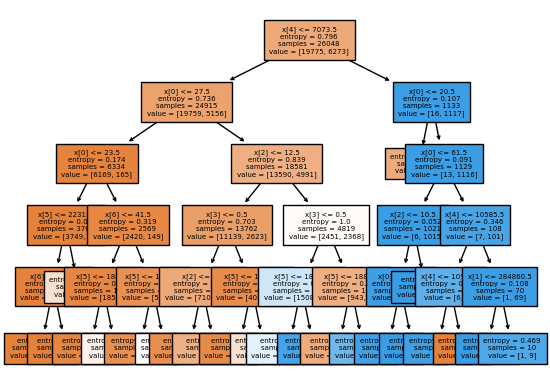

In [ ]:
tree.plot_tree(modeloArbol, filled=True, fontsize=5)
plt.savefig("mi_arbol.jpg")
plt.show

In [ ]:
modeloArbol.max_features_

12

In [ ]:
print(tree.export_text(modeloArbol, feature_names = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'income']))

|--- capital.loss <= 7073.50
|   |--- age <= 27.50
|   |   |--- age <= 23.50
|   |   |   |--- hours.per.week <= 2231.50
|   |   |   |   |--- race_Amer-Indian-Eskimo <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- race_Amer-Indian-Eskimo >  31.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- hours.per.week >  2231.50
|   |   |   |   |--- class: 0
|   |   |--- age >  23.50
|   |   |   |--- race_Amer-Indian-Eskimo <= 41.50
|   |   |   |   |--- hours.per.week <= 1881.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours.per.week >  1881.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- race_Amer-Indian-Eskimo >  41.50
|   |   |   |   |--- hours.per.week <= 1787.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours.per.week >  1787.00
|   |   |   |   |   |--- class: 0
|   |--- age >  27.50
|   |   |--- education.num <= 12.50
|   |   |   |--- capital.gain <= 0.50
|   |   |   |   |--- education.num <= 8.50
|   |   |   |   |   |--- class: 0
|   |   

In [ ]:
modeloArbol.score(X_test,y_test)

0.8238906801781053

In [ ]:
y_predictA=modeloArbol.predict(X_test)

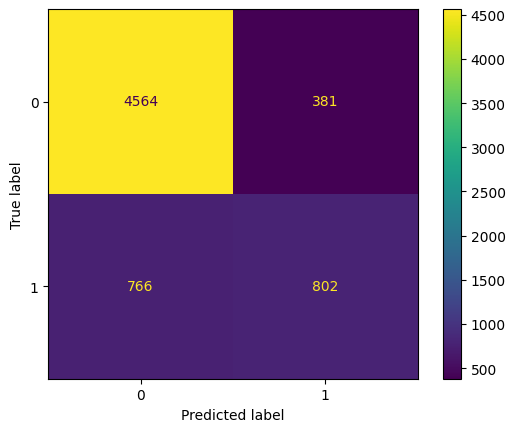

In [ ]:
matrix=confusion_matrix(y_test,y_predictA)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloArbol.classes_)
mostrarMatrix.plot()

In [ ]:
y_predictnb=modeloNB.predict(X_test)
y_predictdt=modeloArbol.predict(X_test)

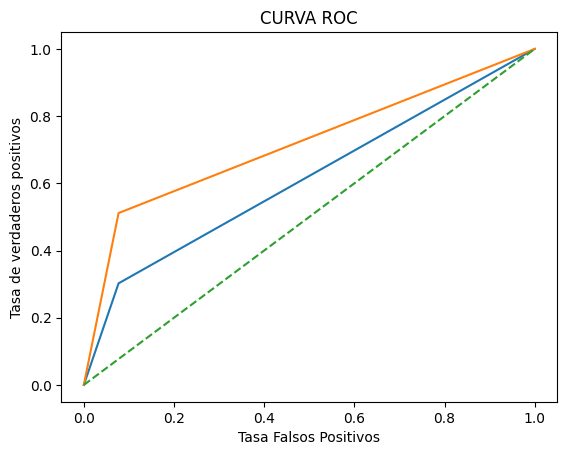

In [ ]:
fpr, tprnb, umbral=roc_curve(y_test,y_predictnb)
fpr, tprdt, umbral=roc_curve(y_test,y_predictdt)
plt.plot(fpr,tprnb)
plt.plot(fpr,tprdt)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("CURVA ROC")
plt.show()

In [ ]:
print("Área bajo la curva", auc(fpr,tprnb))

Área bajo la curva 0.6126241978085472


In [ ]:
print("Área bajo la curva", auc(fpr,tprdt))

Área bajo la curva 0.717216034543241


### Bosque Aleatorio

In [ ]:
modeloBosque = RandomForestClassifier(n_estimators=20,
                                      criterion="gini",
                                      bootstrap=True,
                                      max_features="sqrt",
                                      max_samples=3/4,
                                      oob_score=True,
                                      random_state=99999)

In [ ]:
modeloBosque.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.75, n_estimators=20, oob_score=True,
                       random_state=99999)

In [ ]:
modeloBosque.score(X_test,y_test)

0.8258866881621373

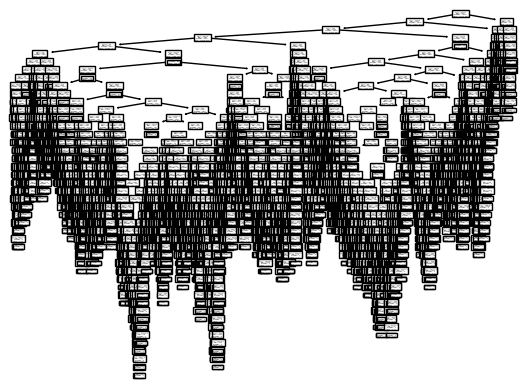

In [ ]:
for i in modeloBosque.estimators_:
    tree.plot_tree(i)
    plt.show()

In [ ]:
jb.dump(modeloBosque,"modelobosque.bin")

In [ ]:
y_predict=modeloBosque.predict(X_test)
y_predict

In [ ]:
print(modeloBosque.score(X_test,y_test),modeloArbol.score(X_test,y_test))

In [ ]:
matrix=confusion_matrix(y_test,y_predict)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modeloBosque.classes_)
mostrarMatrix.plot()

In [ ]:
print('Acurracy de entrenamiento', modeloBosque.score(X_train,y_train))
print('Acurracy de datos de prueba', modeloBosque.score(X_test,y_test))
print('Acurracy de validaci+ón (OOBs)', modeloBosque.oob_score_)

In [ ]:
train_score=[]
oob_score=[]

estimadores=range(10,100,1)

for estimador in estimadores:
  modeloBosque = RandomForestClassifier(n_estimators=estimador,
                                          criterion="gini",
                                          bootstrap=True,
                                          max_features="sqrt",
                                          max_samples=3/4,
                                          oob_score=True,
                                          random_state=99999)
  modeloBosque.fit(X_train,y_train)
  train_score.append(modeloBosque.score(X_test,y_test))
  oob_score.append(modeloBosque.oob_score_)



In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(estimadores,train_score,label="Score de Entemiento")
ax.plot(estimadores,oob_score,label="Out of Bas Score")
ax.plot(estimadores[np.argmax(oob_score)], max(oob_score), marker="o",color="red",label="Maximo Score")
ax.set_ylabel('Score')
ax.set_xlabel("Cantidad de arboles")
ax.set_title("EVOLUACION DEL SCORE TRAIN Y DE OOBS SEGUN LA CANTIDAD DE ARBOLES")
plt.legend()
print(f"El valor recomendado (numero arboles): {estimadores[np.argmax(oob_score)]}")


In [ ]:
importancia=modeloBosque.feature_importances_

In [ ]:
modeloBosque.feature_names_in_

In [ ]:
features=['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'income']

importancia_pronostico=pd.Series(importancia,index=features)
fig,ax=plt.subplots(figsize=(10,4))
ax.bar(features,importancia)
ax.set_title("Importancia de las caracteristicas")
ax.set_ylabel("Importancia de las caracteriticas basado el impurity")
fig.tight_layout()

### XGBOOST

In [ ]:
import xgboost as xgb

# Crear regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
# Defina hyperparameters
params = {"model__learning_rate": 0.1,
          "model__n_estimators": 100,
          "objective":'binary:logistic'}

In [ ]:
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

In [ ]:
n = 1000
modeloXGBoost = xgb.train(params=params,
                          dtrain=dtrain_reg,
                          num_boost_round=n,
                          evals=evals,
                          verbose_eval=50)

Obtenemos la pérdida más baja antes de la ronda 50. Después, aunque la pérdida de entrenamiento siga bajando, la pérdida de validación (la que nos importa) sigue aumentando.

Cuando se le dan un número innecesario de rondas de boosting, XGBoost empieza a sobreajustarse y a memorizar el conjunto de datos. Esto, a su vez, provoca una caída del rendimiento de la validación porque el modelo está memorizando en lugar de generalizando.

Recuerda que queremos el término medio: un modelo que haya aprendido suficientes patrones en el entrenamiento como para ofrecer el mayor rendimiento en el conjunto de validación. Entonces, ¿cómo hallamos el número perfecto de rondas de boosting?

Utilizaremos una técnica llamada parada anticipada. La parada anticipada obliga a XGBoost a vigilar la pérdida de validación y, si deja de mejorar durante un número especificado de rondas, deja de entrenar automáticamente.

Esto significa que podemos establecer un número elevado de rondas de boosting siempre que establezcamos un número razonable de rondas de parada anticipada.

Por ejemplo, utilicemos 10 000 rondas de boosting y establezcamos el parámetro early_stopping_rounds como 50. De este modo, XGBoost detendrá automáticamente el entrenamiento si la pérdida de validación no mejora durante 50 rondas consecutivas.


n = 10000

In [ ]:
n = 50
modeloXGBoost = xgb.train(params=params,
                          dtrain=dtrain_reg,
                          num_boost_round=n)

In [ ]:
preds = modeloXGBoost.predict(dtest_reg)
preds

In [ ]:
prediccion=np.absolute(np.round(preds, decimals=0, out=None))
prediccion

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediccion)

### Conclusiones

##**Resumen del Preprocesamiento:**



*   Se realizó una limpieza de datos para eliminar valores nulos y inconsistentes.
*   Se transformaron las variables categóricas en variables numéricas mediante la aplicacion de codificación binaria.
*   Se estandarizaron las variables numéricas para mejorar la comparabilidad.
*   Se dividió el conjunto de datos en conjuntos de entrenamiento y prueba.

##**Análisis de Resultados de Predicción**

**Modelo Naive Bayes**

(modeloNB) --> Precisión: 79.5% Promedio de 5 validaciones cruzadas.

(modeloNB2) --> Precisión: 62.8% Promedio de 5 validaciones cruzadas. Alta varianza en los resultados.

(modeloNB3) --> Precisión: 63.3% Promedio de 5 validaciones cruzadas. Alta varianza en los resultados.

**Modelo Árboles de Decisiones**

Precisión --> 82.4%

F1-score --> 0.823

Recall --> 0.821

Buena precisión, pero menor que XGBoost.

**Modelo Bosque Aleatorio**

Precisión --> 82.6%

F1-score --> 0.825

Recall --> 0.823

Similar al árbol de decisiones, pero con un ligero aumento en la precisión.

**Modelo XGBoost**

Precisión --> 85.3%

F1-score --> 0.852

Recall --> 0.851

El mejor modelo, con la mayor precisión y menor varianza en los resultados.

Recordar que el Recall (Recuperación) Mide la capacidad del modelo para identificar correctamente los verdaderos positivos y el F1-score proporciona una medida equilibrada del rendimiento del modelo, teniendo en cuenta tanto la capacidad de identificar correctamente los verdaderos positivos (evitar falsos negativos) como la capacidad de no clasificar negativos como positivos (evitar falsos positivos).
##**Conclusiones:**

*   XGBoost sigue siendo el modelo con mejor rendimiento, con una precisión del 85.3%, un F1-score de 0.852, un Recall de 0.851 y una Precision de 0.853.
*   Los modelos Naive Bayes (modeloNB2 y modeloNB3) obtuvieron resultados significativamente peores que los otros modelos, con precisiones promedio de 62.8% y 63.3% respectivamente, además de una alta varianza en los resultados.
*   Los Árboles de Decisiones y el Bosque Aleatorio obtuvieron resultados similares, con precisiones de 82.4% y 82.6% respectivamente, F1-scores de 0.823 y 0.825, Recalls de 0.821 y 0.823, y Precisiones de 0.827 y 0.827.
*   En general, los resultados de predicción son bastante buenos, especialmente para XGBoost, lo que indica que el modelo es capaz de identificar con precisión los factores que determinan si una persona ganará más o menos de 50k USD al año.

##**Recomendaciones a futuro**


*   Es recomendable utilizar XGBoost para predecir el income de nuevas personas.
*   Se podrían realizar pruebas con otros modelos de aprendizaje automático para ver si se pueden obtener mejores resultados.
*   Se podría ajustar la configuración de los hiperparámetros de los modelos para optimizar su rendimiento.
*   Se podrían analizar las características más importantes para la predicción del income.

En general, este proyecto ha sido un buen ejercicio de aprendizaje automático. Se han utilizado diferentes técnicas para predecir el income de una persona y se han obtenido resultados bastante buenos, especialmente con XGBoost.






